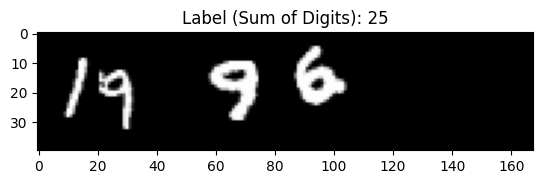

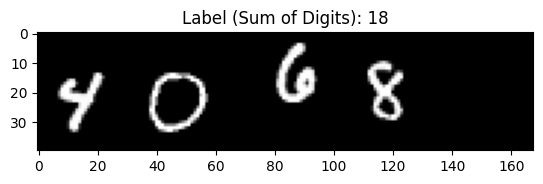

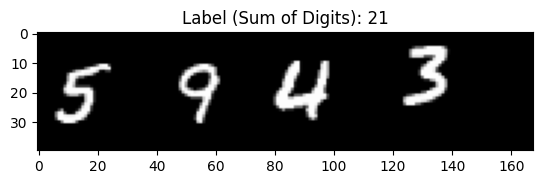

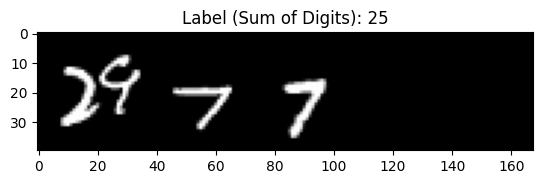

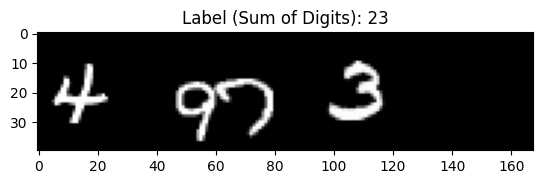

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.load('data0.npy')
labels = np.load('lab0.npy')

# Normalize data
data = data / 255.0

# Reshape data
data = data.reshape(data.shape[0], data.shape[1], data.shape[2], 1)

# Visualizing a few images and their labels
for i in range(5):
    plt.imshow(data[i].squeeze(), cmap='gray')
    plt.title(f"Label (Sum of Digits): {labels[i]}")
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Spliting the dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN model
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(data.shape[1], data.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Regression output for predicting the sum
])



In [ ]:
import tensorflow.keras.backend as K
# making custom accuaracy fucntion for calulating accuracy
def custom_accuracy(y_true, y_pred):
    y_true = K.cast(y_true, dtype='float32')
    return K.mean(K.abs(y_true - y_pred) <= 5)


In [ ]:
baseline_model.compile(optimizer='adam', loss='mse', metrics=['mae', custom_accuracy])


In [ ]:
history = baseline_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 647ms/step - custom_accuracy: 0.4712 - loss: 15.0033 - mae: 3.0790 - val_custom_accuracy: 0.4785 - val_loss: 20.2360 - val_mae: 3.6199
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 647ms/step - custom_accuracy: 0.4699 - loss: 14.2018 - mae: 2.9802 - val_custom_accuracy: 0.4915 - val_loss: 18.0472 - val_mae: 3.4012
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 640ms/step - custom_accuracy: 0.4727 - loss: 13.1076 - mae: 2.8817 - val_custom_accuracy: 0.4817 - val_loss: 17.7987 - val_mae: 3.3763
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 649ms/step - custom_accuracy: 0.4651 - loss: 12.3718 - mae: 2.8027 - val_custom_accuracy: 0.4874 - val_loss: 16.9901 - val_mae: 3.2994
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 79s 632ms/step - custom_accuracy: 0.4650 - loss: 12.6865 - mae: 2.8233 - val_custom_accuracy: 0.4497 - val_loss: 26.5604 - val_mae: 4.2277
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 84s 651ms/step - custom_accuracy: 0.4646 - loss: 12.4248 - mae: 2

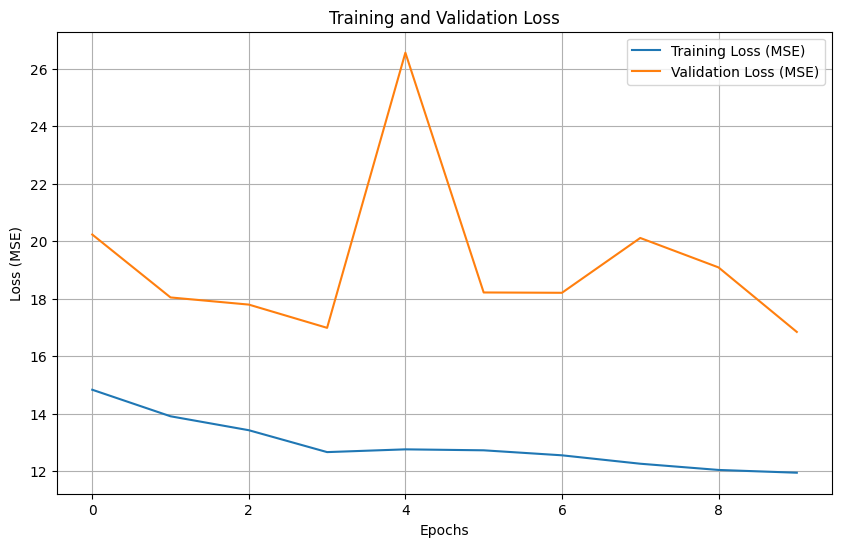

In [ ]:
# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()